# PM2.5 Data Pre-processing

In [21]:
import os
import seaborn
import numpy as np
import pandas as pd

### Section 1: Opening PM2.5 file

In [22]:
PATH = "c:\Documents"
File1="LAEI2013_Emissions_summary-PM2.5_v1.1.xlsx"

df1= pd.read_excel(os.path.join(PATH, File1),sheet_name='PM2.5 by Grid Exact Cut', skiprows=3)               
df1.head(5)

,Year,LAEI 1km2 ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household and Garden,Small Waste and Accidental Fires,Agriculture,...,Non-TfL Bus and Coach_Exhaust,Non-TfL Bus and Coach_Brake,Non-TfL Bus and Coach_Tyre,Artic HGV_Exhaust,Artic HGV_Brake,Artic HGV_Tyre,Rigid HGV_Exhaust,Rigid HGV_Brake,Rigid HGV_Tyre,Total
0,2008,5910,1,510500,203500,NonGLA,NonGLA,0.000082,0.005744,0.020731,...,0.000480,0.000242,0.000045,0.000117,0.000067,0.000031,0.000935,0.000598,0.000127,0.108977
1,2008,5911,2,511500,203500,NonGLA,NonGLA,0.000261,0.016584,0.019324,...,0.022399,0.006057,0.002589,0.264056,0.078078,0.073212,0.129440,0.060747,0.026817,2.452868
2,2008,5912,3,512500,203500,NonGLA,NonGLA,0.000163,0.015833,0.022205,...,0.010974,0.003881,0.001149,0.195765,0.062038,0.054854,0.073103,0.041257,0.015488,1.453573
3,2008,5915,4,515500,203500,NonGLA,NonGLA,0.000245,0.015984,0.021598,...,0.000478,0.000242,0.000045,0.000116,0.000066,0.000031,0.000932,0.000596,0.000126,0.117733
4,2008,5916,5,516500,203500,NonGLA,NonGLA,0.000212,0.011686,0.025406,...,0.000432,0.000218,0.000040,0.000105,0.000060,0.000028,0.000841,0.000539,0.000114,0.107517


In [23]:
#check datatypes
df=df1.iloc[:,0:30]
df.dtypes

Year                                  int64
LAEI 1km2 ID                          int64
GRID_ExactCut_ID                      int64
Easting                               int64
Northing                              int64
Borough                              object
Zone                                 object
Household and Garden                float64
Small Waste and Accidental Fires    float64
Agriculture                         float64
STW                                   int64
WTS                                 float64
Landfill                            float64
NRMM Construction                   float64
NRMM Industry                       float64
C&D Dust                            float64
Domestic Gas                        float64
Commercial Gas                      float64
Domestic Other Fuels                float64
Commercial Other Fuels              float64
Industry Part A                     float64
Industry Part B                     float64
Aviation                        

In [24]:
#check datatypes
df=df1.iloc[:,30:65]
df.dtypes

Motorcycle_Tyre                  float64
Taxi_Exhaust                     float64
Taxi_Brake                       float64
Taxi_Tyre                        float64
Petrol Car_Exhaust               float64
Petrol Car_Brake                 float64
Petrol Car_Tyre                  float64
Diesel Car_Exhaust               float64
Diesel Car_Brake                 float64
Diesel Car_Tyre                  float64
Electric Car_Exhaust               int64
Electric Car_Brake               float64
Electric Car_Tyre                float64
Petrol LGV_Exhaust               float64
Petrol LGV_Brake                 float64
Petrol LGV_Tyre                  float64
Diesel LGV_Exhaust               float64
Diesel LGV_Brake                 float64
Diesel LGV_Tyre                  float64
Electric LGV_Exhaust               int64
Electric LGV_Brake               float64
Electric LGV_Tyre                float64
TfL Bus_Exhaust                  float64
TfL Bus_Brake                    float64
TfL Bus_Tyre    

In [25]:
#check datatypes
df1.shape

(20130, 65)

### Section 2: Data Tidy - Column Naming

In [26]:
#Renaming columns
df1=df1.rename(columns={
    'LAEI 1km2 ID':'LAEI_1km2_ID',
    'House and Garden':'House_and_Garden',
    'Small Waste and Accidental Fires':'Small_Waste_and_Accidental_Fires',
    'NRMM Construction':'NRMM_Construction',
    'C&D Dust':'C&D_Dust',
    'Domestic Gas':'Domestic_Gas',
    'Commercial Gas':'Commercial_Gas',
    'Industry Part A':'Industry_Part_A',
    'Industry Part B':'Industry_Part_B',
    'Passenger Shipping':'Passenger_Shipping',
    'Commercial Shipping':'Commercial_Shipping',
    'Rail Freight':'Rail_Freight',
    'Rail Passengers':'Rail_Passengers',
    'Petrol Car_Exhaust':'PetrolCar_Exhaust',
    'Petrol Car_Brake':'PetrolCar_Brake',
    'Petrol Car_Tyre':'PetrolCar_Tyre',
    'Diesel Car_Exhaust':'DieselCar_Exhaust', 
    'Diesel Car_Brake':'DieselCar_Brake',
    'Diesel Car_Tyre':'DieselCar_Tyre',
    'Electric Car_Exhaust':'ElectricCar_Exhaust',
    'Electric Car_Brake':'ElectricCar_Brake',
    'Electric Car_Tyre':'ElectricCar_Tyre',
    'Petrol LGV_Exhaust':'PetrolLGV_Exhaust',
    'Petrol LGV_Brake':'PetrolLGV_Brake',
    'Petrol LGV_Tyre':'PetrolLGV_Tyre',
    'Diesel LGV_Exhaust':'DieselLGV_Exhaust',
    'Diesel LGV_Brake':'DieselLGV_Brake',
    'Diesel LGV_Tyre':'DieselLGV_Tyre',
    'Electric LGV_Exhaust':'ElectricLGV_Exhaust',
    'Electric LGV_Brake':'ElectricLGV_Brake',
    'Electric LGV_Tyre':'ElectricLGV_Tyre',
    'TfL Bus_Exhaust':'TfLBus_Exhaust',
    'TfL Bus_Brake':'TfLBus_Brake',
    'TfL Bus_Tyre':'TfLBus_Tyre',
    'Non-TfL Bus and Coach_Exhaust':'Non-TfLBus_and_Coach_Exhaust',
    'Non-TfL Bus and Coach_Brake':'Non-TfLBus_and_Coach_Brake',
    'Non-TfL Bus and Coach_Tyre':'Non-TfLBus_and_Coach_Tyre',
    'Artic HGV_Exhaust':'ArticHGV_Exhaust',
    'Artic HGV_Brake':'ArticHGV_Brake',
    'Artic HGV_Tyre':'ArticHGV_Tyre',
    'Rigid HGV_Exhaust':'RigidHGV_Exhaust',
    'Rigid HGV_Brake':'RigidHGV_Brake',
    'Rigid HGV_Tyre':'RigidHGV_Tyre',
})

df1.columns

Index(['Year', 'LAEI_1km2_ID', 'GRID_ExactCut_ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Household and Garden',
       'Small_Waste_and_Accidental_Fires', 'Agriculture', 'STW', 'WTS',
       'Landfill', 'NRMM_Construction', 'NRMM Industry', 'C&D_Dust',
       'Domestic_Gas', 'Commercial_Gas', 'Domestic Other Fuels',
       'Commercial Other Fuels', 'Industry_Part_A', 'Industry_Part_B',
       'Aviation', 'Passenger_Shipping', 'Commercial_Shipping', 'Rail_Freight',
       'Rail_Passengers', 'Resuspension', 'Motorcycle_Exhaust',
       'Motorcycle_Brake', 'Motorcycle_Tyre', 'Taxi_Exhaust', 'Taxi_Brake',
       'Taxi_Tyre', 'PetrolCar_Exhaust', 'PetrolCar_Brake', 'PetrolCar_Tyre',
       'DieselCar_Exhaust', 'DieselCar_Brake', 'DieselCar_Tyre',
       'ElectricCar_Exhaust', 'ElectricCar_Brake', 'ElectricCar_Tyre',
       'PetrolLGV_Exhaust', 'PetrolLGV_Brake', 'PetrolLGV_Tyre',
       'DieselLGV_Exhaust', 'DieselLGV_Brake', 'DieselLGV_Tyre',
       'ElectricLGV_Exhaust', 'Elec

### Section 3: Split Data by Zone

In [27]:
#Extract 2013 data
df1= df1[df1['Year']== 2013]
df1

,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household and Garden,Small_Waste_and_Accidental_Fires,Agriculture,...,Non-TfLBus_and_Coach_Exhaust,Non-TfLBus_and_Coach_Brake,Non-TfLBus_and_Coach_Tyre,ArticHGV_Exhaust,ArticHGV_Brake,ArticHGV_Tyre,RigidHGV_Exhaust,RigidHGV_Brake,RigidHGV_Tyre,Total
6710,2013,5910,1,510500,203500,NonGLA,NonGLA,0.000085,0.005889,0.010158,...,0.000163,0.000149,0.000028,0.000053,0.000066,0.000031,0.000386,0.000594,0.000126,0.085784
6711,2013,5911,2,511500,203500,NonGLA,NonGLA,0.000273,0.017001,0.008853,...,0.011375,0.003170,0.002191,0.105108,0.030046,0.061772,0.063264,0.025447,0.021553,1.814326
6712,2013,5912,3,512500,203500,NonGLA,NonGLA,0.000170,0.016231,0.010547,...,0.005158,0.001669,0.000893,0.073946,0.018917,0.042399,0.038239,0.015941,0.012459,1.017989
6713,2013,5915,4,515500,203500,NonGLA,NonGLA,0.000256,0.016385,0.010898,...,0.000162,0.000149,0.000028,0.000052,0.000066,0.000030,0.000385,0.000592,0.000125,0.100359
6714,2013,5916,5,516500,203500,NonGLA,NonGLA,0.000222,0.011980,0.012904,...,0.000146,0.000134,0.000025,0.000047,0.000059,0.000027,0.000347,0.000534,0.000113,0.090045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,2013,10059,3351,531500,179500,Southwark,Inner,0.000002,0.000130,0.000002,...,0.001136,0.000681,0.000127,0.000898,0.000811,0.000376,0.004795,0.007859,0.001662,0.193990
10061,2013,10059,3352,531500,179500,Southwark,Central,0.000126,0.158665,0.000099,...,0.050220,0.039247,0.007306,0.004724,0.005073,0.002364,0.039962,0.070103,0.014901,1.981395
10062,2013,9714,3353,530500,181500,Camden,Central,0.000137,0.413971,0.000000,...,0.030428,0.017173,0.003186,0.007462,0.005871,0.002722,0.068990,0.093407,0.019752,4.127951
10063,2013,9716,3354,532500,181500,Islington,Central,0.000002,0.020986,0.000030,...,0.000559,0.000428,0.000079,0.002051,0.001679,0.000779,0.006972,0.009795,0.002071,0.300705


In [28]:
# Confirm the shape of the dataset
df1.dtypes

Year                  int64
LAEI_1km2_ID          int64
GRID_ExactCut_ID      int64
Easting               int64
Northing              int64
                     ...   
ArticHGV_Tyre       float64
RigidHGV_Exhaust    float64
RigidHGV_Brake      float64
RigidHGV_Tyre       float64
Total               float64
Length: 65, dtype: object

### Section 4: Missing and Duplicate Data

In [29]:
#Find the means, and locate mean <0.05
dfn=df1.iloc[:,8:64]
dfn1=dfn.mean(axis=0)<0.05
dfn1
#df_False=dfn1[dfn1 == False]
#df_False
df_True=dfn1[dfn1 == True]
df_True

Agriculture                     True
STW                             True
WTS                             True
Landfill                        True
NRMM Industry                   True
C&D_Dust                        True
Domestic_Gas                    True
Commercial_Gas                  True
Domestic Other Fuels            True
Commercial Other Fuels          True
Industry_Part_A                 True
Industry_Part_B                 True
Aviation                        True
Passenger_Shipping              True
Commercial_Shipping             True
Rail_Freight                    True
Rail_Passengers                 True
Resuspension                    True
Motorcycle_Exhaust              True
Motorcycle_Brake                True
Motorcycle_Tyre                 True
Taxi_Exhaust                    True
Taxi_Brake                      True
Taxi_Tyre                       True
PetrolCar_Exhaust               True
PetrolCar_Tyre                  True
DieselCar_Brake                 True
D

In [30]:
#Extract the columns and save to df1
df2=df1.drop(list(df_True.index.values),axis=1)
df2


,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household and Garden,Small_Waste_and_Accidental_Fires,NRMM_Construction,PetrolCar_Brake,DieselCar_Exhaust,DieselLGV_Exhaust,Total
6710,2013,5910,1,510500,203500,NonGLA,NonGLA,0.000085,0.005889,0.000000,0.005483,0.006586,0.003897,0.085784
6711,2013,5911,2,511500,203500,NonGLA,NonGLA,0.000273,0.017001,0.000000,0.087049,0.427031,0.323925,1.814326
6712,2013,5912,3,512500,203500,NonGLA,NonGLA,0.000170,0.016231,0.000000,0.051604,0.219665,0.156910,1.017989
6713,2013,5915,4,515500,203500,NonGLA,NonGLA,0.000256,0.016385,0.000000,0.005465,0.007764,0.004502,0.100359
6714,2013,5916,5,516500,203500,NonGLA,NonGLA,0.000222,0.011980,0.000000,0.004934,0.006562,0.003943,0.090045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,2013,10059,3351,531500,179500,Southwark,Inner,0.000002,0.000130,0.000000,0.015949,0.012015,0.015391,0.193990
10061,2013,10059,3352,531500,179500,Southwark,Central,0.000126,0.158665,0.200227,0.092029,0.096506,0.143598,1.981395
10062,2013,9714,3353,530500,181500,Camden,Central,0.000137,0.413971,0.062971,0.163823,0.191362,0.284516,4.127951
10063,2013,9716,3354,532500,181500,Islington,Central,0.000002,0.020986,0.000427,0.013600,0.014629,0.020426,0.300705


<AxesSubplot:>

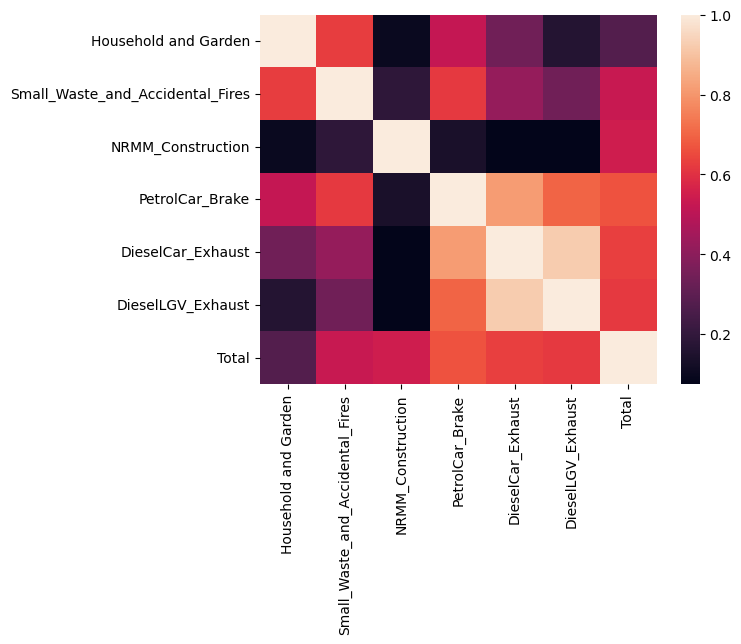

In [31]:
#Check correlation performance
data=pd.DataFrame(df2.iloc[:,7:])
data1=data.corr()
seaborn.heatmap(data1)

In [32]:
#Remove DieselCar_Exhaust since it's correlation is 0.91
df2.drop("DieselCar_Exhaust",axis=1, inplace=True)

In [33]:
# Check for Null data 
df2.isnull().sum()

Year                                0
LAEI_1km2_ID                        0
GRID_ExactCut_ID                    0
Easting                             0
Northing                            0
Borough                             0
Zone                                0
Household and Garden                0
Small_Waste_and_Accidental_Fires    0
NRMM_Construction                   0
PetrolCar_Brake                     0
DieselLGV_Exhaust                   0
Total                               0
dtype: int64

### Section 5: Split data by Zone

In [34]:
# Zone: NonGLA
df3= df2[df2['Zone']== 'NonGLA']
df3

# Zone: Outer
df4= df2[df2['Zone']== 'Outer']
df4

# Zone: Inner
df5= df2[df2['Zone']== 'Inner']
df5

# Zone: Central
df6= df2[df2['Zone']== 'Central']
df6

,Year,LAEI_1km2_ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household and Garden,Small_Waste_and_Accidental_Fires,NRMM_Construction,PetrolCar_Brake,DieselLGV_Exhaust,Total
9969,2013,9541,3260,529500,182500,City of Westminster,Central,2.170051e-07,0.000012,0.000000,0.000183,0.000580,0.009723
9970,2013,9543,3261,531500,182500,Camden,Central,9.927190e-06,0.013907,0.013021,0.013614,0.025160,0.298947
9971,2013,9545,3262,533500,182500,Hackney,Central,0.000000e+00,0.000000,0.007471,0.000098,0.000052,0.008481
9972,2013,9545,3263,533500,182500,City,Central,9.280018e-07,0.000050,0.000000,0.001720,0.003596,0.044332
9974,2013,9884,3265,528500,180500,City of Westminster,Central,9.721159e-05,0.137317,0.344100,0.159676,0.288607,3.551124
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,2013,9717,3350,533500,181500,Hackney,Central,0.000000e+00,0.003716,0.000000,0.002064,0.004593,0.036463
10061,2013,10059,3352,531500,179500,Southwark,Central,1.260940e-04,0.158665,0.200227,0.092029,0.143598,1.981395
10062,2013,9714,3353,530500,181500,Camden,Central,1.369523e-04,0.413971,0.062971,0.163823,0.284516,4.127951
10063,2013,9716,3354,532500,181500,Islington,Central,1.531243e-06,0.020986,0.000427,0.013600,0.020426,0.300705


### Section 6: Save data preparation to a file, filename: PM2.5-Data_Ready.xlsx

In [35]:
PATH = "c:\Documents"
OUTPUT_FILENAME = "PM2.5-Data_Ready.xlsx"

FILE_EXIST = os.path.exists(os.path.join(PATH, OUTPUT_FILENAME))
if FILE_EXIST:
    os.remove(os.path.join(PATH, OUTPUT_FILENAME))

with pd.ExcelWriter(os.path.join(PATH, OUTPUT_FILENAME)) as writer:
    df2.to_excel(writer, sheet_name='PM2.5')
    df3.to_excel(writer, sheet_name='PM2.5_NonGLA')
    df4.to_excel(writer,sheet_name='PM2.5_Outer')
    df5.to_excel(writer,sheet_name='PM2.5_Inner')
    df6.to_excel(writer,sheet_name='PM2.5_Central')